In [32]:
import pandas as pd
import numpy as np
#繪圖用套件
import matplotlib.pyplot as plt
import seaborn as sns
#決策樹切分套件
from sklearn.model_selection import train_test_split
#決策樹演算法套件
from sklearn import  tree
from sklearn.tree import DecisionTreeClassifier
#分析報告與混淆矩陣套件
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn import metrics



上傳所需檔案

In [2]:
from google.colab import files

uploaded = files.upload()

Saving iris.csv to iris (2).csv


#觀察資料集

讀檔 pd.read_csv('檔名',encoding '編碼方式，此可省略，但省略有時會error')

In [35]:
df=pd.read_csv('iris.csv',encoding='utf-8')
df

,Sepal Length,Sepal Width,Petal Length,Petal Width,Variety
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


查看所有columns名字

In [36]:
df.columns

Index(['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width',
       'Variety'],
      dtype='object')

計算機本統計量

In [37]:
df.describe()

,Sepal Length,Sepal Width,Petal Length,Petal Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


相關係數矩陣

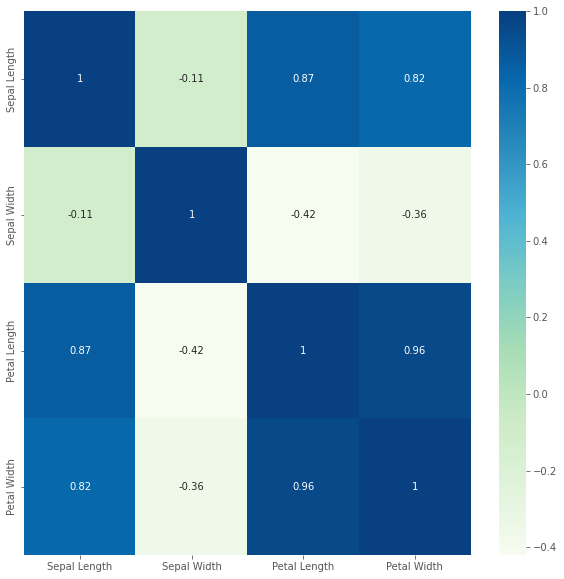

In [41]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(df.corr().round(2), annot=True, ax=ax, cmap='GnBu')

觀察資料樣態

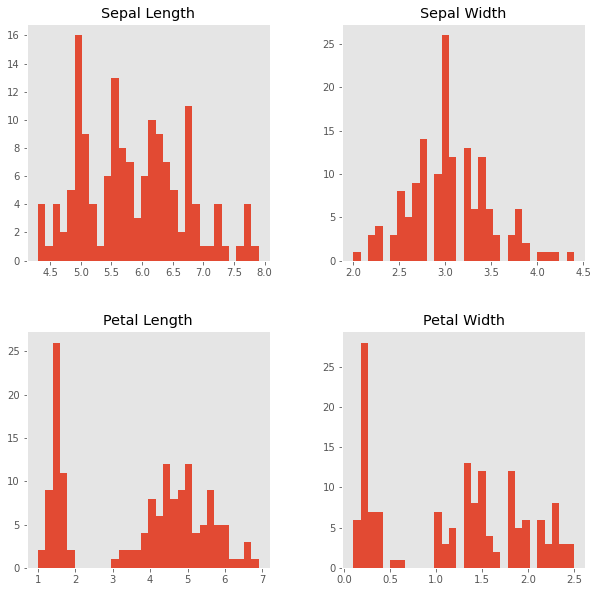

In [43]:
df.hist(bins=30,figsize=(10,10),grid=False)
plt.show()

## **建立虛擬變數**
以大於Sepal Length平均為例

In [53]:
df['Sepal Length mean']=0
#若Sepal Length大於Sepal Length的平均，Sepal Length mean為1 若小於則為0
df.loc[df['Sepal Length']>df['Sepal Length'].mean(),['Sepal Length mean']]=1
df['Sepal Length mean5']=df['Sepal Length mean'].astype(int)
df

,Sepal Length,Sepal Width,Petal Length,Petal Width,Variety,Sepal Length mean,Sepal Length mean5
0,5.1,3.5,1.4,0.2,Iris-setosa,0,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0,0
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,1,1
146,6.3,2.5,5.0,1.9,Iris-virginica,1,1
147,6.5,3.0,5.2,2.0,Iris-virginica,1,1
148,6.2,3.4,5.4,2.3,Iris-virginica,1,1


透過長條圖，觀察自變數和應變數的關係，建議使用類別行變數

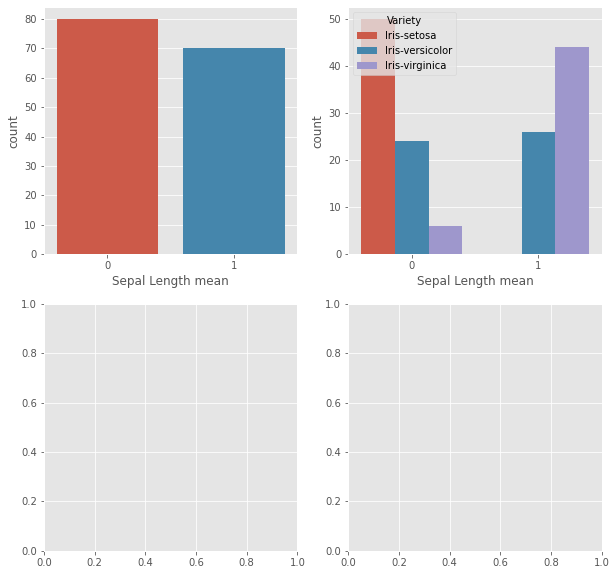

In [61]:
features_cat=['Sepal Length mean']

fig,axes=plt.subplots(ncols=2,nrows=2,figsize=(10,0))

for i in range(0,len(features_cat)):
    sns.countplot(x=df[features_cat[i]],ax=axes[i][0])
    sns.countplot(x=df[features_cat[i]],hue=df['Variety'],ax=axes[i][1])
    

若無使用類別行變數

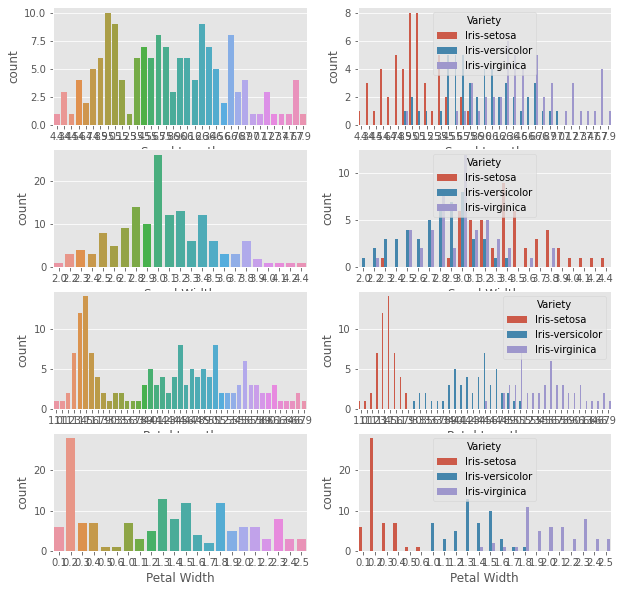

In [63]:
features_cat=['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width']

fig,axes=plt.subplots(ncols=2,nrows=4,figsize=(10,10))

for i in range(0,len(features_cat)):
    sns.countplot(x=df[features_cat[i]],ax=axes[i][0])
    sns.countplot(x=df[features_cat[i]],hue=df['Variety'],ax=axes[i][1])
    

## **檢視缺失值**
檢查缺值，若有缺值會error

In [8]:
df.isnull().sum()

Sepal Length          0
Sepal Width           0
Petal Length          0
Petal Width           0
Variety               0
Sepal Length mean     0
Sepal Length mean5    0
dtype: int64

> # **填補缺失值** 

In [9]:
#Way1:缺失值補平均數
df_mean=df.fillna(df.mean())
df_mean

,Sepal Length,Sepal Width,Petal Length,Petal Width,Variety,Sepal Length mean,Sepal Length mean5
0,5.1,3.5,1.4,0.2,Iris-setosa,0,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0,0
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,1,1
146,6.3,2.5,5.0,1.9,Iris-virginica,1,1
147,6.5,3.0,5.2,2.0,Iris-virginica,1,1
148,6.2,3.4,5.4,2.3,Iris-virginica,1,1


In [10]:
#Way2:缺失值補0
df2_fill_0=df.fillna('0')
df2_fill_0.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width,Variety,Sepal Length mean,Sepal Length mean5
0,5.1,3.5,1.4,0.2,Iris-setosa,0,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0,0


In [11]:
#Way3:缺失值補前一row的值
df2_fill_ffill=df.fillna(method='ffill')
df2_fill_ffill.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width,Variety,Sepal Length mean,Sepal Length mean5
0,5.1,3.5,1.4,0.2,Iris-setosa,0,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0,0


> # **資料切分** 

#test_size控制切分比例
#random_state亂數，以防每次切分結果不同
#shuffle=False 切分時不隨機切分(通常用於時間序列資料，此資料已有排序所以不適用)


In [12]:
x = df.drop(['Variety'],axis=1)
y = df['Variety']
def split_data(x,y,test_size):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= test_size,random_state=8)
    return np.array(x_train), np.array(x_test), np.array(y_train), np.array(y_test)
x_train, x_test, y_train, y_test = split_data(x, y, test_size= 0.3)

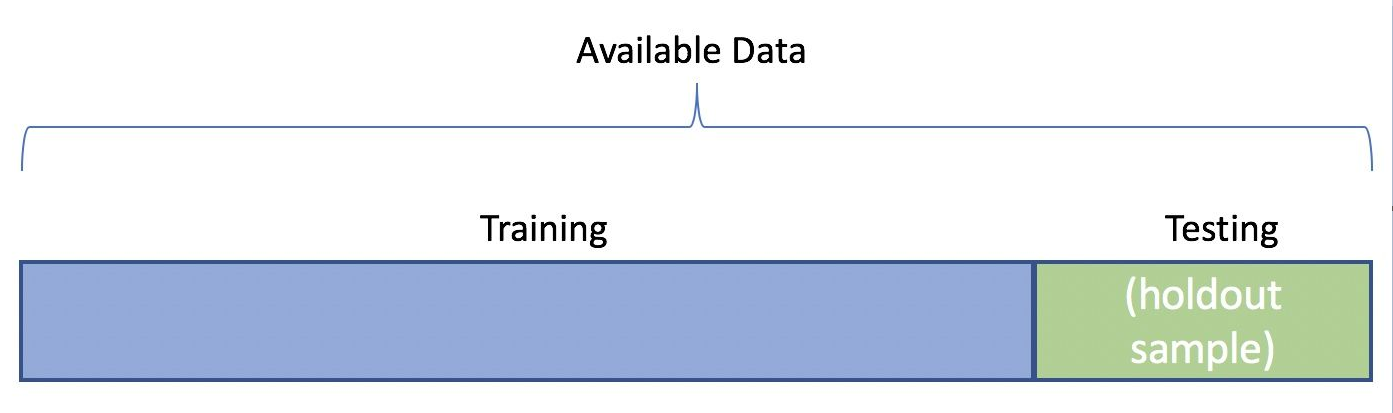

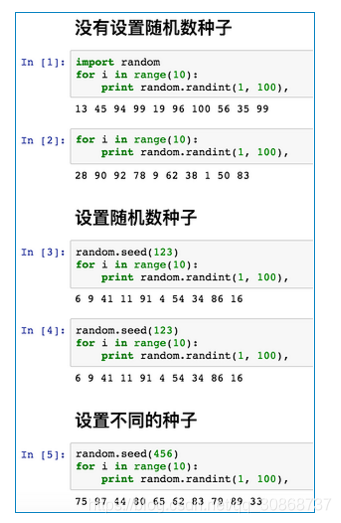

In [13]:
x_train = np.array(x_train)
x_test = np.array(x_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

> # **參數設定** 

In [14]:
classifier=tree.DecisionTreeClassifier(class_weight=None, 
                    criterion='gini', 
                    max_depth=10, 
                    max_features=3, 
                    max_leaf_nodes=None,
                    min_samples_leaf=0.01,
                     min_samples_split=100, 
                     min_weight_fraction_leaf=0.05)
classifier=classifier.fit(x_train,y_train)

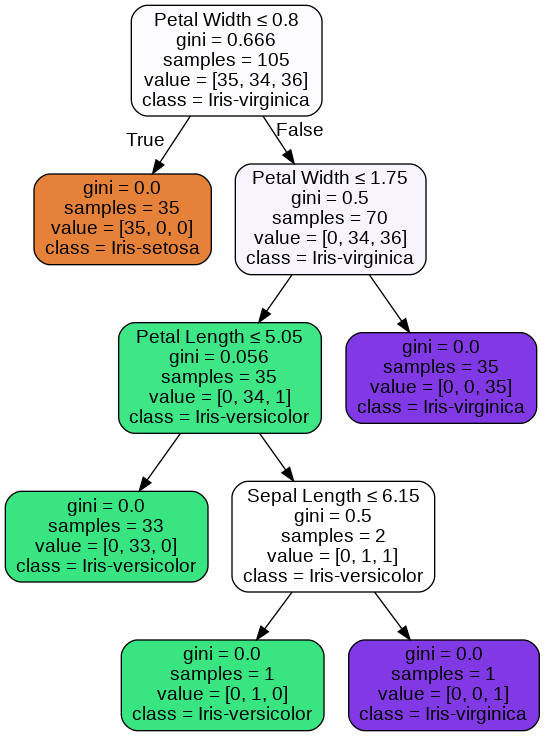

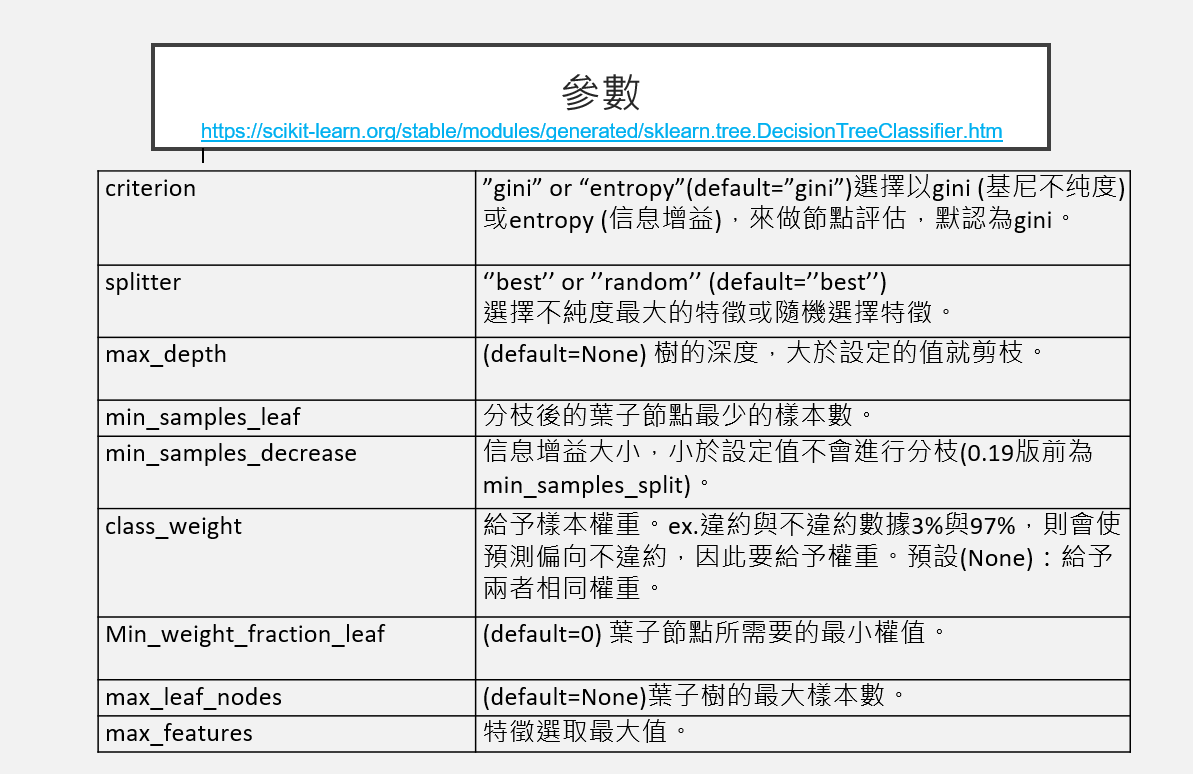

In [15]:
classifier.predict(x_test)

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica'], dtype=object)

In [16]:
ty_hat = classifier.predict(x_test)
print('accuracy:', metrics.accuracy_score(y_test, ty_hat))
#print('f1_score:', metrics.f1_score(y_test, ty_hat))
print('confusion_metrix:\n', metrics.confusion_matrix(y_test,ty_hat))


accuracy: 0.6444444444444445
confusion_metrix:
 [[15  0  0]
 [ 0  0 16]
 [ 0  0 14]]


accuracy: 0.6444444444444445
f1_score: 0.6444444444444445
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       0.00      0.00      0.00        16
 Iris-virginica       0.47      1.00      0.64        14

       accuracy                           0.64        45
      macro avg       0.49      0.67      0.55        45
   weighted avg       0.48      0.64      0.53        45



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


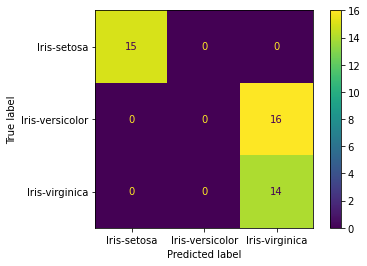

In [17]:
# accuracy 準確性
print('accuracy:', metrics.accuracy_score(y_test, ty_hat))
# f1_score
print('f1_score:', metrics.f1_score(y_test, ty_hat,average='micro'))

# confusion_matrix
plot_confusion_matrix(classifier,x_test,y_test)
from sklearn.metrics import classification_report
print(classification_report(y_test,ty_hat))

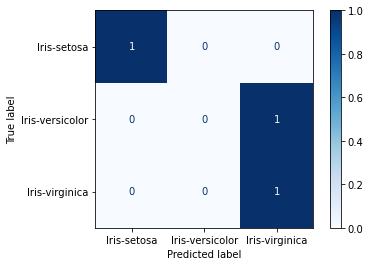

In [18]:
plot_confusion_matrix(classifier,x_test,y_test,             
            cmap=plt.cm.Blues,
            normalize='true')

import feature 特徵重要性

findfont: Font family ['DFKai-sb'] not found. Falling back to DejaVu Sans.
findfont: Font family ['DFKai-sb'] not found. Falling back to DejaVu Sans.


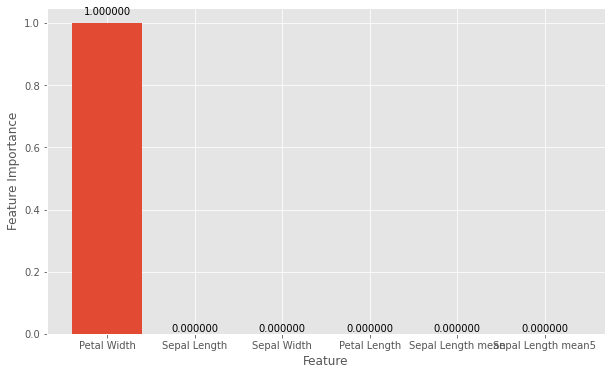

In [19]:
import matplotlib.pyplot as plt
#DataFrame轉串列
feature_names= x.keys().tolist()
classifier.feature_importances_.tolist() 
a=classifier.feature_importances_.tolist() 

df = pd.DataFrame({'feature':feature_names,  
                   'feature_importance':classifier.feature_importances_.tolist()}) 
df = df.sort_values(by=['feature_importance'], ascending=False).reset_index(drop=True) 

def autolabel(rects): 
    for rect in rects: 
        height = rect.get_height() 
        plt.text(rect.get_x()+rect.get_width()/2., 1.02*height, '%f'%float(height), 
                 ha='center', va='bottom') 

plt.style.use('ggplot') 
fig = plt.figure(figsize=(10, 6)) 
plt.rcParams['font.family'] = 'DFKai-sb'  #標楷體 
gini = plt.bar(df.index, df['feature_importance'], align='center') 
plt.xlabel('Feature')  #X軸名稱 
plt.ylabel('Feature Importance')  #Y軸名稱 
plt.xticks(df.index, df['feature'])  #X軸項目名稱 

autolabel(gini) 

plt.show() 

#決策樹圖形化法

法1

[Text(232.5, 339.75, 'X[3] <= 0.8\ngini = 0.666\nsamples = 105\nvalue = [35, 34, 36]'),
 Text(116.25, 113.25, 'gini = 0.0\nsamples = 35\nvalue = [35, 0, 0]'),
 Text(348.75, 113.25, 'gini = 0.5\nsamples = 70\nvalue = [0, 34, 36]')]

findfont: Font family ['DFKai-sb'] not found. Falling back to DejaVu Sans.


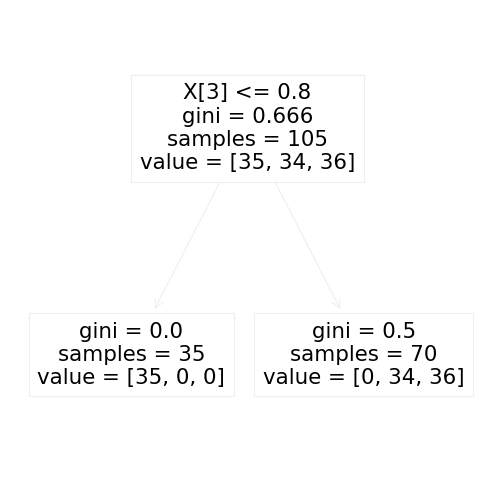

In [20]:
fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(4,4),dpi=150)
tree.plot_tree(classifier)

法2

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


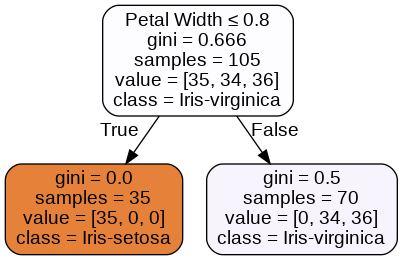

In [21]:
from sklearn import tree
import pydotplus
from sklearn.externals.six import StringIO  
from IPython.display import Image  
#下面輸入各類(y)名稱
target_names=['Iris-setosa','Iris-versicolor','Iris-virginica']
feature=x.keys().tolist()
dot_data = StringIO()  
tree.export_graphviz(classifier, out_file=dot_data,  
           feature_names=feature,  
           class_names=target_names,  
           filled=True, rounded=True,  
           special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

#**更改參數**

/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)


accuracy: 0.9111111111111111
confusion_metrix:
 [[15  0  0]
 [ 0 15  1]
 [ 0  3 11]]
accuracy: 0.9111111111111111
f1_score: 0.9111111111111111
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       0.83      0.94      0.88        16
 Iris-virginica       0.92      0.79      0.85        14

       accuracy                           0.91        45
      macro avg       0.92      0.91      0.91        45
   weighted avg       0.91      0.91      0.91        45



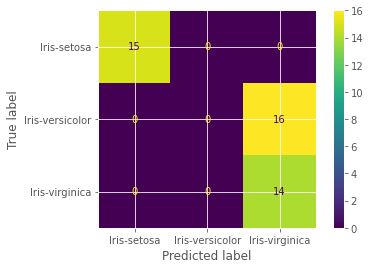

In [22]:
classifier2  = tree.DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10, max_features=4, max_leaf_nodes=None,
                            
                             presort=False, random_state=8, splitter='best')

'''classifier=tree.DecisionTreeClassifier(class_weight=None, 
                    criterion='gini', 
                    max_depth=10, 
                    max_features=3, 
                    max_leaf_nodes=None,
                    min_samples_leaf=0.01,
                     min_samples_split=100, 
                     min_weight_fraction_leaf=0.05)'''
#n_estimators幾棵樹
classifier2=classifier2.fit(x_train,y_train)
classifier2.predict(x_test)
ty_hat = classifier2.predict(x_test)
print('accuracy:', metrics.accuracy_score(y_test, ty_hat))
#print('f1_score:', metrics.f1_score(y_test, ty_hat))
print('confusion_metrix:\n', metrics.confusion_matrix(y_test,ty_hat))
# accuracy 準確性
print('accuracy:', metrics.accuracy_score(y_test, ty_hat))
# f1_score
print('f1_score:', metrics.f1_score(y_test, ty_hat,average='micro'))

# confusion_matrix
plot_confusion_matrix(classifier,x_test,y_test)
from sklearn.metrics import classification_report
print(classification_report(y_test,ty_hat))


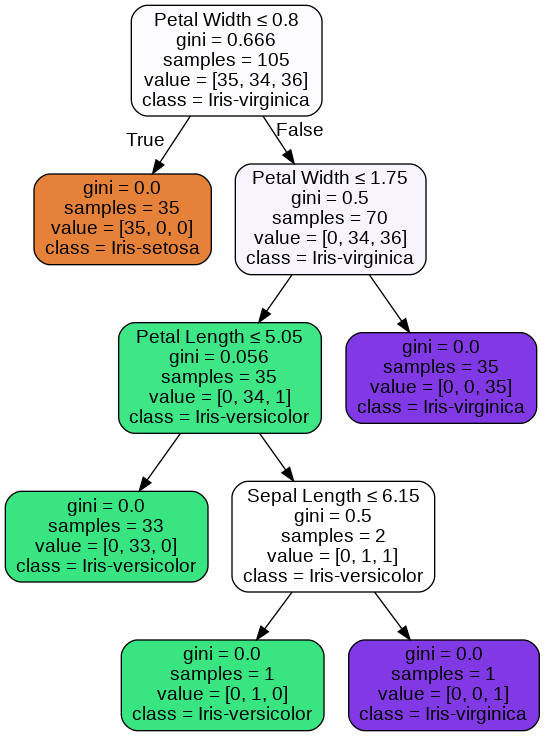

In [23]:
from sklearn import tree
import pydotplus
from sklearn.externals.six import StringIO  
from IPython.display import Image  
target_names=['Iris-setosa','Iris-versicolor','Iris-virginica']
feature=x.keys().tolist()
dot_data = StringIO()  
tree.export_graphviz(classifier2, out_file=dot_data,  
           feature_names=feature,  
           class_names=target_names,  
           filled=True, rounded=True,  
           special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())